## Introduction:

Stroke is the second leading cause of death and the third leading cause of disability in the world. The primary objective of this portfolio is to construct a prediction model for predicting stroke and to assess the accuracy of the model. Different models will be analysed using the provided dataset to see which produces reliable and repeatable results. The successful models will then be used to create an ensemble system which predicts whether a new patient is at risk of a stroke or not.

## Given:

1) Dataset containing medical information about more than 600 people.

2) Articles for choosing feature variables and categorising numerical feature variables

## Reformulation of Problem and Designing a Solution:

The primary objective is to create a ensemble system which predicts the probability of a stroke in a patient. 

There are a set standard steps which needs to be followed first for every data science project. This involves:

1) Data Collection : Loading the provided dataset.

2) Data Preparation : Cleaning the data like removing values, outliers, imbalances and categorising.

3) Data Analysis : Studying the data provided and choosing feature variables for the model.

4) Training the model : Choosing the necessary algorithms for the models.

5) Evaluvation : Measuring the accuracy and reliability of the trained models.

6) Serve Model : Putting the model into production.

7) Retraining Model : To check whether old predictions are still valid.

## Importing Libraries:

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings(action='ignore')

## Dataset:

In [ ]:
#Loading the .csv file
df = pd.read_csv(('Dataset_raw.csv'))
#Printing dataframe
df

,RANDID,TOTCHOL,AGE,SYSBP,DIABP,TIMEMI,CIGPDAY,TIME,STROKE,BMI
0,2448,196.0,52.0,100.0,62.0,6438.0,0.0,4628,2.0,NaN
1,6238,223.0,58.0,122.0,75.0,8766.0,0.0,4344,2.0,28.5
2,11252,232.0,58.0,131.0,70.0,8766.0,0.0,4285,2.0,24.6
3,11263,216.0,55.0,140.0,70.0,8766.0,0.0,4351,1.0,31.2
4,12806,208.0,57.0,127.0,75.0,8766.0,0.0,4289,2.0,22.0
...,...,...,...,...,...,...,...,...,...,...
615,1828967,201.0,59.0,149.0,80.0,8766.0,0.0,4285,1.0,30.5
616,1829622,212.0,61.0,187.0,105.0,8766.0,0.0,4287,1.0,22.7
617,1831641,306.0,70.0,170.0,85.0,8766.0,0.0,4365,1.0,24.1
618,1833245,159.0,66.0,170.0,96.0,8766.0,18.0,4295,1.0,24.0


## Data Pre-Processing:

The medical team indicates the dataset requires some pre-processing. They have suggested to remove any row in the dataset with missing (NaN) values.

In [ ]:
# The number of rows with missing values:
print(df.isnull().sum())
print(df.shape)

RANDID     0
TOTCHOL    8
AGE        4
SYSBP      5
DIABP      3
TIMEMI     1
CIGPDAY    2
TIME       0
STROKE     2
BMI        3
dtype: int64
(620, 10)


In [ ]:
# Removing rows with missing values:
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.shape)

RANDID     0
TOTCHOL    0
AGE        0
SYSBP      0
DIABP      0
TIMEMI     0
CIGPDAY    0
TIME       0
STROKE     0
BMI        0
dtype: int64
(596, 10)


In [ ]:
# New dataset:
df

,RANDID,TOTCHOL,AGE,SYSBP,DIABP,TIMEMI,CIGPDAY,TIME,STROKE,BMI
1,6238,223.0,58.0,122.0,75.0,8766.0,0.0,4344,2.0,28.5
2,11252,232.0,58.0,131.0,70.0,8766.0,0.0,4285,2.0,24.6
3,11263,216.0,55.0,140.0,70.0,8766.0,0.0,4351,1.0,31.2
4,12806,208.0,57.0,127.0,75.0,8766.0,0.0,4289,2.0,22.0
5,14367,177.0,64.0,148.0,66.0,8766.0,18.0,4438,1.0,25.7
...,...,...,...,...,...,...,...,...,...,...
614,1824174,196.0,53.0,126.5,72.5,8766.0,0.0,4466,2.0,28.6
615,1828967,201.0,59.0,149.0,80.0,8766.0,0.0,4285,1.0,30.5
616,1829622,212.0,61.0,187.0,105.0,8766.0,0.0,4287,1.0,22.7
617,1831641,306.0,70.0,170.0,85.0,8766.0,0.0,4365,1.0,24.1


RANDID is same as row count. We do not need another identifier. Thus, we will drop this column.

In [ ]:
df.drop("RANDID",inplace=True,axis=1)

Further data processing is possible only after analysing the given data and choosing feature variables.

## Exploratory Data Analysis:

### Multicollinearity Analysis:

The presence of multicollinearity between the various variables can be calculated using a correlation matrix and using this data we can choose potential feature variables.

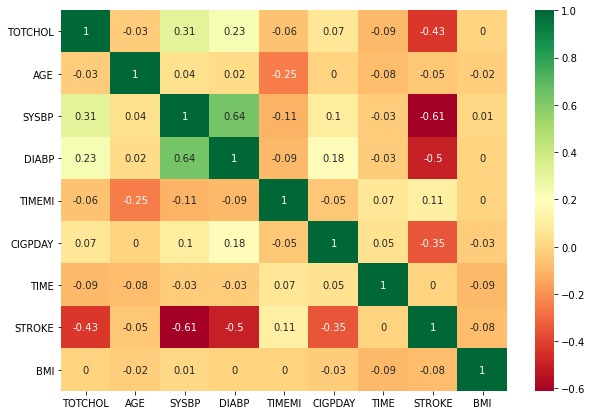

In [ ]:
corr = df.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'RdYlGn');

From the collinearity matrix, it can be observed that there is a significant relationship between STROKE and TOTCHOL, SYSBP, DIABP and CIGPDAY. While AGE, TIMEMI, TIME and BMI does not share such a relationship with STROKE. This can be further proved using a categorical feature analysis.

### Categorical Feature Analysis

Eight variables will be charted on countplots and the data will be analysed. Where blue bars signify a stroke and orange signifies no stroke.

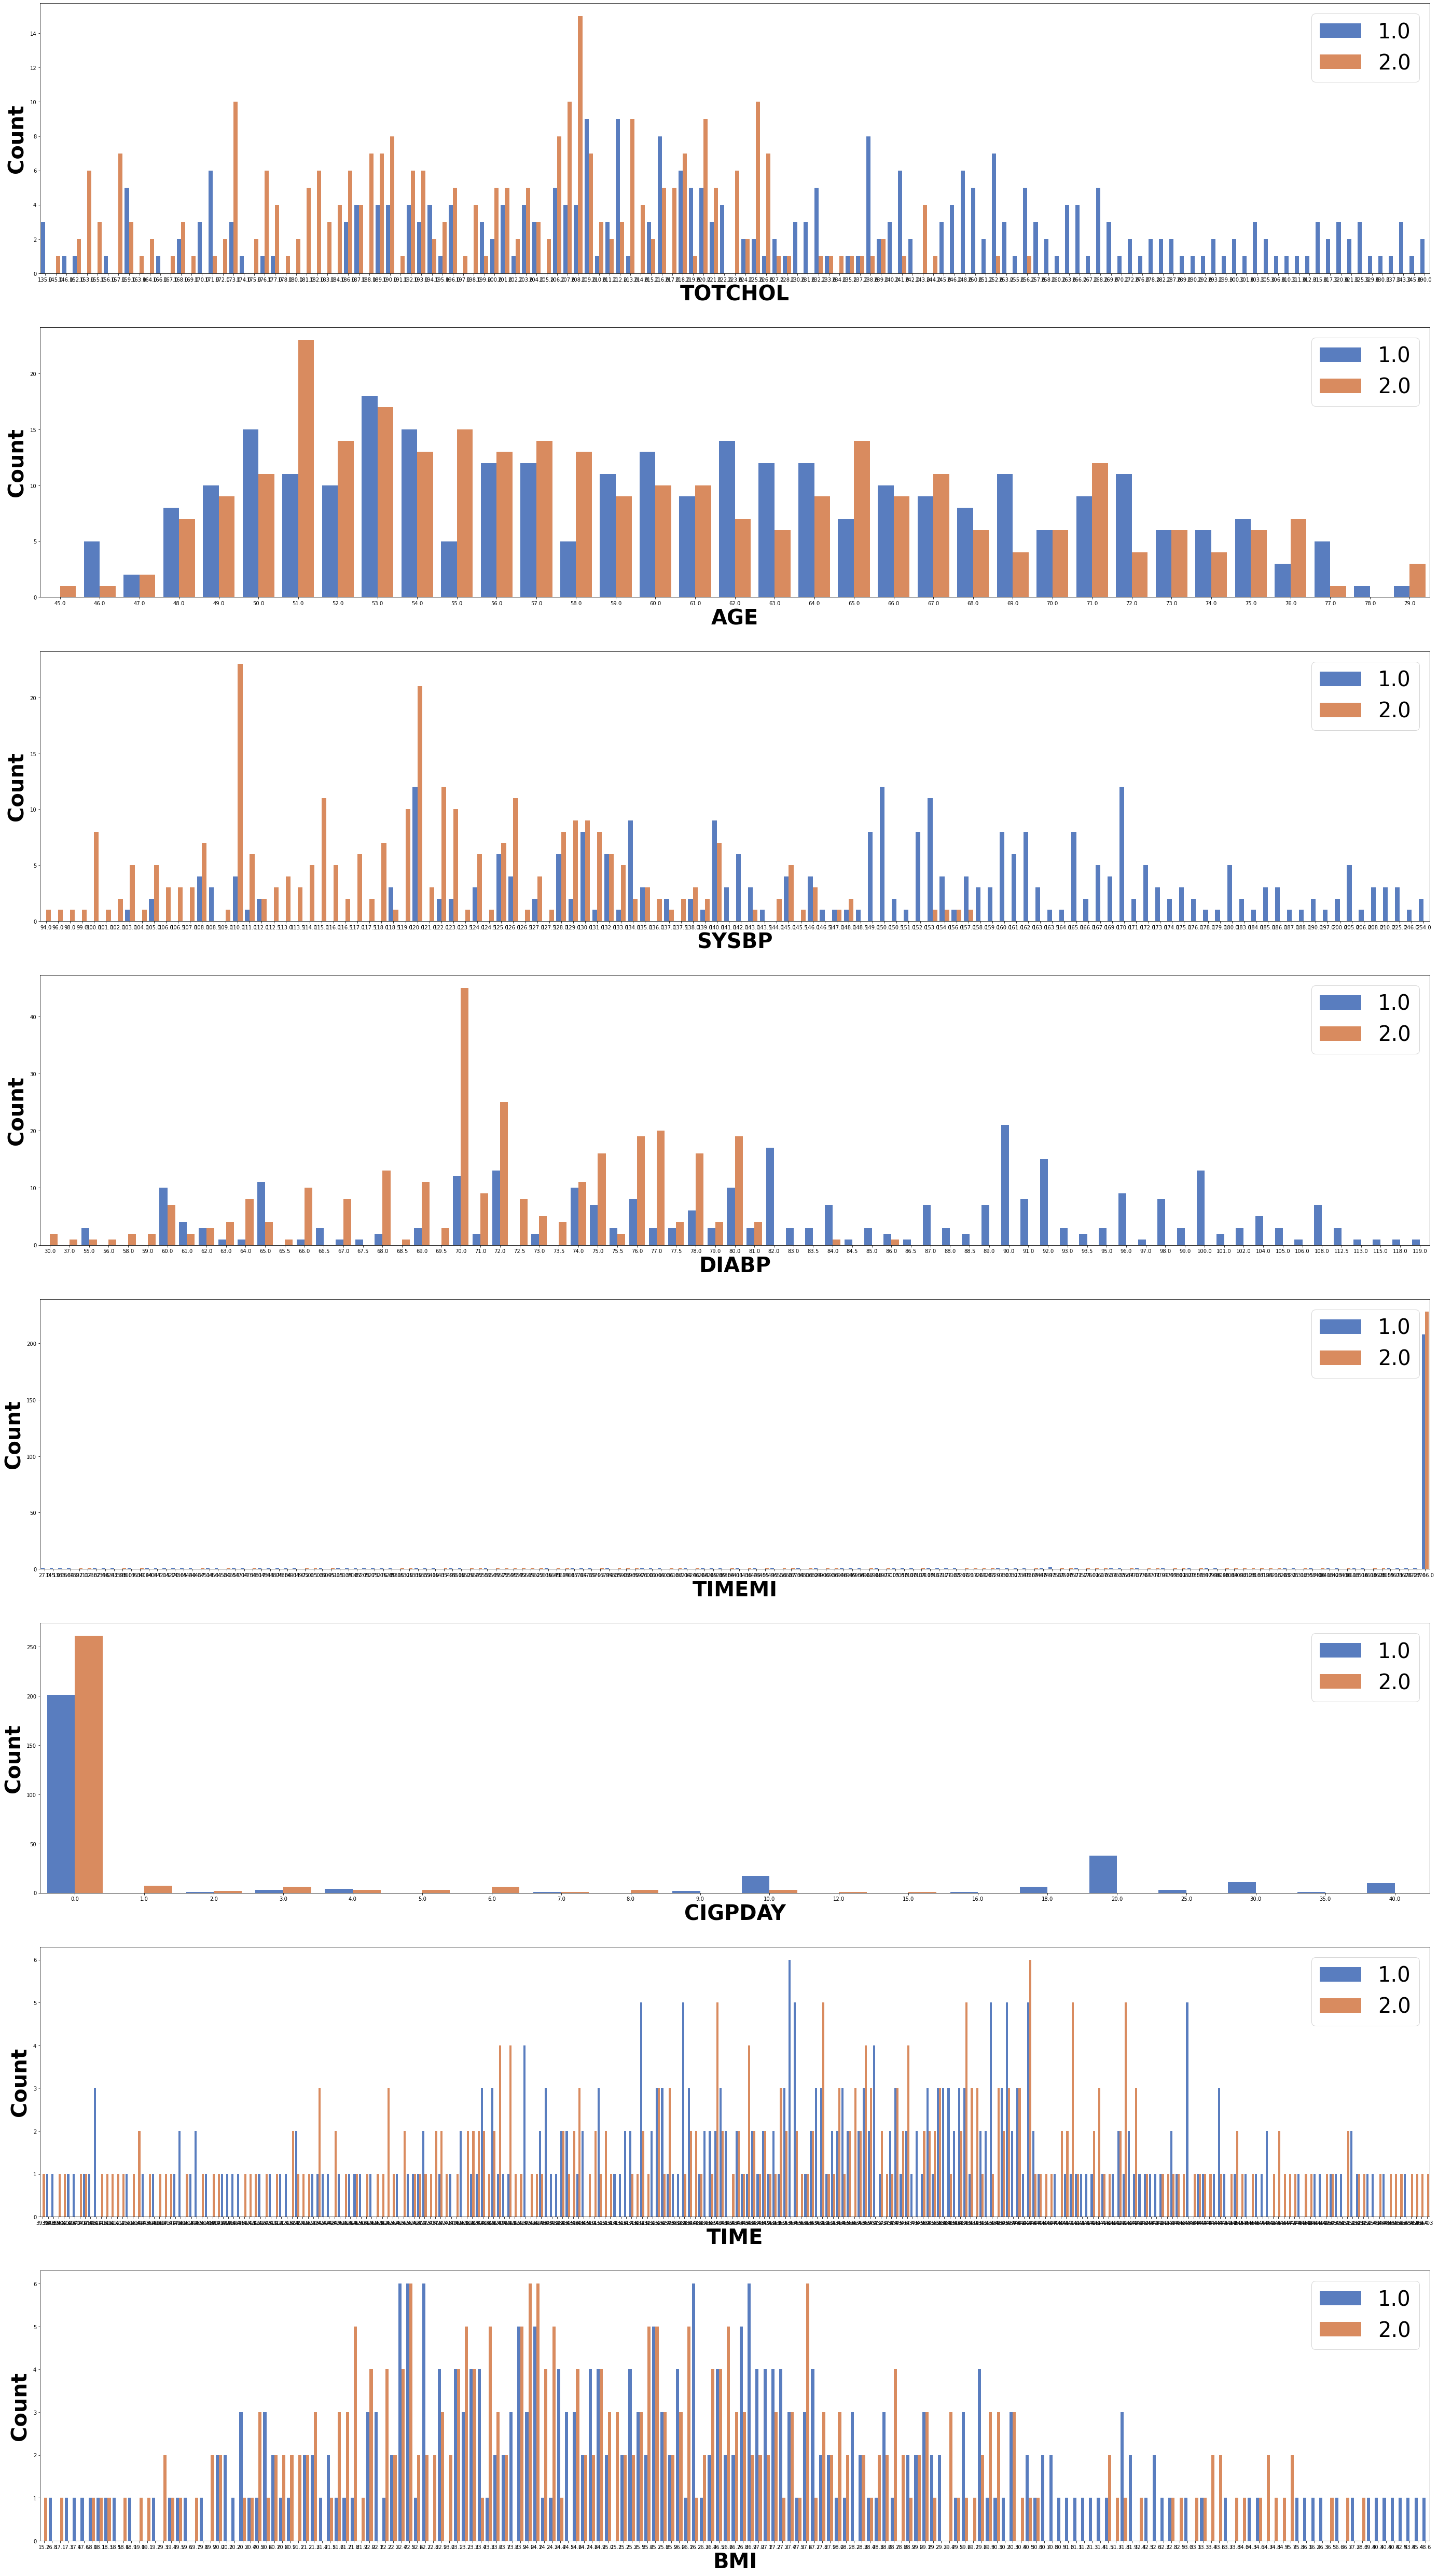

In [ ]:
df_cat = ['TOTCHOL','AGE','SYSBP','DIABP','TIMEMI','CIGPDAY','TIME', 'BMI']

fig, axs = plt.subplots(8, 1, figsize=(48,90))
axs = axs.flatten()

for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=df, ax=axs[i], hue =df['STROKE'], palette = 'muted')
    axs[i].set_xlabel(f"{col_name}", weight = 'bold',size ='40')
    axs[i].set_ylabel('Count', weight='bold', size ='40')
    axs[i].legend(loc=1, prop={'size': 40})

From the graphs it is evident which variables need to be chosen as feature variables: 

1) In case of TOTCHOL(Chart 1), it can be seen that strokes are very likely at higher values and the chances are lower at lower values.

2) In case of AGE(Chart 2), the chances of getting a stroke is pretty even at all ages and therefore not useful.

3) For SYSBP(Chart 3) and DIABP(Chart 4), it can be seen that strokes are very likely at higher values and the chances are lower at lower values.

4) In case of TIMEMI(Chart 5), the chances of a stroke cannot be predicted using the data given.

5) In case of CIGPDAY(Chart 6), people who smoke and don't smoke get strokes but people who smoke defenitely increase the chances of it happening. It is further supported by article 3.

6) In case of TIME(Chart 7) and BMI(Chart 8), the chances of getting a stroke is pretty even at higher and lower values and therefore not useful. In case of BMI, higher values automatically means high values for TOTCHOL, SYSBP and DIABP and therefore can be omitted.

### Feature Variables Selected are: TOTCHOL, SYSBP, DIABP and CIGPDAY

### More Pre-Processing:

From the analysis above, AGE, TIMEMI, TIME and BP will be dropped from the dataset.

In [ ]:
df.drop("AGE",inplace=True,axis=1)
df.drop("TIMEMI",inplace=True,axis=1)
df.drop("TIME",inplace=True,axis=1)
df.drop("BMI",inplace=True,axis=1)

The data in TOTCHOL, SYSBP, DIABP can be categorised using the articles 2 and 3. 

When Total cholestrol is less than 200mg/dL, it is considered desirable(0), 200-239 mg/dL is Borderline high(1) and 240mg/dL and above	is High(2).

Incase of SYSBP, less than 140mmHg is normal(0), between 140 to 160 mmHg is considered borderline(1) and above 160mmHg is hypertensive(2).

For DIABP, less than 90mmHg is normal(0), between 90 to 100 mmHg is considered borderline(1) and above 100mmHg is hypertensive(2).

In [ ]:
df['TOTCHOL'] = pd.cut(df['TOTCHOL'], bins=[0, 200, 240, 500], include_lowest=True, labels=[0, 1, 2])
df['SYSBP'] = pd.cut(df['SYSBP'], bins=[0, 140, 160, 500], include_lowest=True, labels=[0, 1, 2])
df['DIABP'] = pd.cut(df['DIABP'], bins=[0, 90, 100, 500], include_lowest=True, labels=[0, 1, 2])

In [ ]:
#New Dataset:
data = df
cstroke = df["STROKE"]
df

,TOTCHOL,SYSBP,DIABP,CIGPDAY,STROKE
1,1,0,0,0.0,2.0
2,1,0,0,0.0,2.0
3,1,0,0,0.0,1.0
4,1,0,0,0.0,2.0
5,0,1,0,18.0,1.0
...,...,...,...,...,...
614,0,0,0,0.0,2.0
615,1,1,0,0.0,1.0
616,1,2,2,0.0,1.0
617,2,2,0,0.0,1.0


### Scaling the Data:

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
columns = ['TOTCHOL','SYSBP','DIABP','CIGPDAY']
stand_scaled = s.fit_transform(df[['TOTCHOL','SYSBP','DIABP','CIGPDAY']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

In [ ]:
D = stand_scaled
D.index = cstroke.index
D = D.join(cstroke)

## Training the Models:

All the predictor variables will be mapped to an array x and target variable (stroke) to an array y.

The following algorithms were chosen to cover a wider scope:

1) Decision Tree

2) Logistic Regression

3) Random Forest

4) Support Vector Machine

5) K Nearest Neighbour

6) Naive Bayes

7) KMeans Clustering

In [ ]:
#Mapping
x=D.drop(['STROKE'], axis=1)
y=D['STROKE']

# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Training
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 124)


The models are stored into a dictionary and fitted.


In [ ]:
models = dict()
models['Decision Tree'] = DecisionTreeClassifier()
models['Logreg'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier()
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['kNN'] = KNeighborsClassifier()
models['Naive Bayes'] = GaussianNB()
models['KMeans'] = KMeans(n_clusters=2, n_init=10, random_state=42)
for model in models:
    
    models[model].fit(x_train, y_train)
    print(model + " Model fitting completed.")

Decision Tree Model fitting completed.
Logreg Model fitting completed.
Random Forest Model fitting completed.
Support Vector Machine Model fitting completed.
kNN Model fitting completed.
Naive Bayes Model fitting completed.
KMeans Model fitting completed.


###### The trained models are then tested and a confusion matrix and classification report is generated.

In [ ]:
print("Test Set Prediction:\n")

for x in models:

    print('*_'*20+x+'_*'*20)
    model = models[x]
    y_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test))

Test Set Prediction:

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_Decision Tree_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
[[82 11]
 [ 9 77]]
              precision    recall  f1-score   support

         1.0       0.90      0.88      0.89        93
         2.0       0.88      0.90      0.89        86

    accuracy                           0.89       179
   macro avg       0.89      0.89      0.89       179
weighted avg       0.89      0.89      0.89       179

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_Logreg_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
[[83 10]
 [ 7 79]]
              precision    recall  f1-score   support

         1.0       0.92      0.89      0.91        93
         2.0       0.89      0.92      0.90        86

    accuracy                           0.91       179
   macro avg       0.90      0.91      0.90       179
weighted avg       0.91      0.91      0.91       179

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_Random Forest_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
[[83 10]
 [

In [ ]:
print('Summary of Accuracy Score\n\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))

Summary of Accuracy Score


Decision Tree Model:  0.8883
Logreg Model:  0.905
Random Forest Model:  0.9106
Support Vector Machine Model:  0.8883
kNN Model:  0.9106
Naive Bayes Model:  0.8101
KMeans Model:  0.257


### From the summary above,  the Decision Tree Model, Logistic Regression Model, Random Forest Model, Support Vector Machine Model and the K-Nearest Neighbour Model are chosen to design the ensemble machine learning model as they have the highest accuracies.

#### The chances for False Negatives are low as the recall score for all the chosen models are quite high.

Cross Validation is done on one of the selected models for reconfirmation.

### Cross Validation:

In [ ]:
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier()
scores = cross_val_score(rfc, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print("")
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.83333333 0.88095238 0.88095238 0.80952381 0.80952381 0.88095238
 0.78571429 0.90243902 0.7804878  0.82926829]

Average cross-validation score: 0.8393


#### Using the mean cross-validation, we can conclude that we expect the model to be around 87% accurate on average.
#### The 10 scores produced by the 10-fold cross-validation shows that there is low variance in the accuracy between folds. So we can conclude that the model is independent of the particular folds used for training.


## Using the Model for Production:

#### As specified earlier, the four selected models will be used to design an ensemble system. The ensemble technique that will be used will be Max Voting where multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

The model has been designed in such a way that the only necessary variables are: TOTCHOL, SYSBP, DIABP and CIGPDAY.

In [ ]:
#Designing the Ensemble System:

x=data.drop(['STROKE'], axis=1)
y=data['STROKE']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()
model4= RandomForestClassifier()
model5= SVC(kernel = 'sigmoid', gamma='scale')

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model5.fit(x_train,y_train)

print(" ") 
print('*_'*20+"Stroke Predictor 9000"+'_*'*20)
print(" ")
print("Please Enter Total Serum Cholestrol, mg/dL:")
a = int(input())
print("Enter Systolic Blood Pressure, mmHg:")
b = int(input())
print("Enter Diastolic Blood Pressure, mmHg:")
c = int(input())
print("Enter Number of Cigaretttes smoked per day:")
d = int(input())

if(a < 200):
    a = 0
elif(a>=200 and a<240):
    a = 1
else:
    a = 2
    
if(b < 140):
    b = 0
elif(b>=140 and b<160):
    b = 1
else:
    b = 2
    
if(c < 90):
    c = 0
elif(c>=90 and c<100):
    c = 1
else:
    c = 2
    

features = np.array([[a, b, c, d]])

pred1=model1.predict(features)
pred2=model2.predict(features)
pred3=model3.predict(features)
pred4=model4.predict(features)
pred5=model5.predict(features)

final_pred = np.array([])
for i in range(0,len(features)):
    final_pred = np.append(final_pred, statistics.mode([pred1[i], pred2[i], pred3[i],pred4[i], pred5[i]]))

print(" ")    
if(final_pred == 1):
    print("The Risk of getting a Stroke is High")
else:
    print("The Risk of getting a Stroke is Low")

 
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_Stroke Predictor 9000_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
 
Please Enter Total Serum Cholestrol, mg/dL:
159
Enter Systolic Blood Pressure, mmHg:
170
Enter Diastolic Blood Pressure, mmHg:
96
Enter Number of Cigaretttes smoked per day:
18
 
The Risk of getting a Stroke is High


## Conclusion:

#### An ensemble system was successfully created using the data given and the accuracy of its components were measured and tested.

## Closing Notes:

#### The other solution methodologies that were attempted were :

#### 1) I tried combining SYSBP and DIABP into one feature variable called ''Pulse  Pressure" (SYSBP - DIABP) but the model was at risk of getting underfitted.

#### 2) I tried to use PCA to reduce the dimensionality of the dataset but the manual feature selection proved to be slightly more accurate. I have added just the code for that implementation as I have reached the word limit.